In [5]:
import warnings
warnings.filterwarnings("ignore")

Иерархическая кластеризация

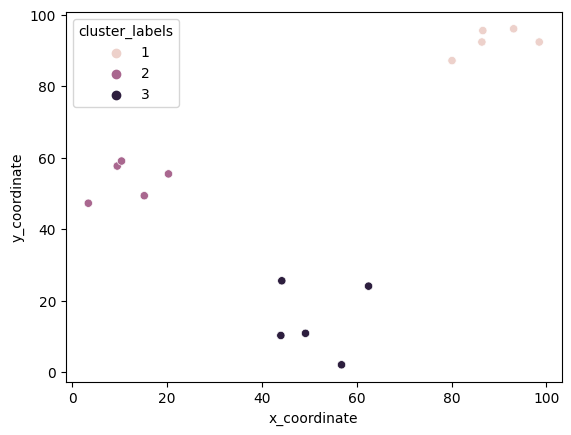

In [2]:
from scipy.cluster.hierarchy import linkage, fcluster
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd
x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4, 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4, 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]
df = pd.DataFrame({'x_coordinate': x_coordinates, 'y_coordinate': y_coordinates})
Z = linkage(df,'ward') #вычисляется расстояние м/у промежуточными кластерами
df['cluster_labels'] = fcluster(Z, 3 , criterion='maxclust') #создает кластеры и создает метки новому столбцу
sns.scatterplot(x='x_coordinate', y='y_coordinate', hue='cluster_labels', data = df)
plt.show() # кластеры от 1

K-MEANS

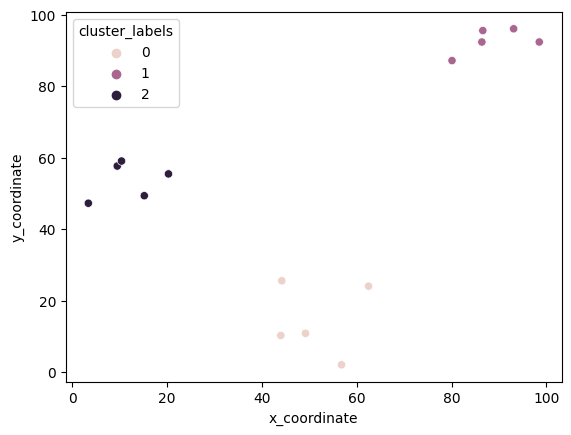

In [6]:
#к-means
from scipy.cluster.vq import kmeans, vq
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd
import random
random.seed((1000,2000))
x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4, 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4, 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]
df = pd.DataFrame({'x_coordinate': x_coordinates, 'y_coordinate': y_coordinates})
centroids,_ = kmeans(df, 3) #считаем центройды ([[23.7, 28. ],
                                                # [ 4.3,  5.9]])
df['cluster_labels'], _ = vq(df, centroids) #назначения кластеров, _ - distortion (для каждой точки)
sns.scatterplot(x='x_coordinate', y='y_coordinate', hue='cluster_labels', data = df)
plt.show() # с нуля

#kmeans(наблюдения, кол-во кластеров, кол-во итераций, порговое значение (алгоритм завершается если distortion меньше порога), проверять ли на NaN)

kmeans(наблюдения, кол-во кластеров, кол-во итераций, порговое значение (алгоритм завершается если distortion меньше порога), проверять ли на NaN или inf)

kmeans(obs, k_or_guess, iter = 20, thresh = 1e-05, check_finite = True)

выход: кластерные центры (code_book) и distortions (одно значение)

vq(obs, code_book, check_finite=True)

выход: кластерные метки distortions (список)  

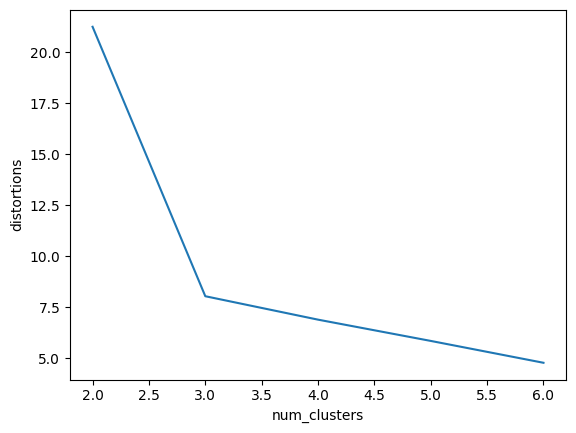

In [8]:
#локтевой график
distortions = []
num_clusters = range(2, 7)
for i in num_clusters:
  centroids, distortion = kmeans(df[['x_coordinate', 'y_coordinate']], i)
  distortions.append(distortion)
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot_data)
plt.show()

In [14]:
#нормализация - делить на std_dev
from scipy.cluster.vq import whiten
data = [5, 1, 3, 3, 2, 3, 3, 8, 1, 2, 2, 3, 5]
scaled_data = whiten(data) # при списка списков деление на std столбца
print(scaled_data)

[2.72733941 0.54546788 1.63640365 1.63640365 1.09093577 1.63640365
 1.63640365 4.36374306 0.54546788 1.09093577 1.09093577 1.63640365
 2.72733941]


Иерархическая кластеризация

In [18]:
import numpy as np
from scipy.cluster.vq import whiten
import pandas as pd
comic_con = pd.read_csv('/content/comic_con.csv')

In [23]:
scaled_data = whiten(comic_con) # при списка списков деление на std столбца
comic_con = pd.DataFrame(scaled_data, columns = ['index', 'x_scaled', 'y_scaled']).drop(columns = 'index')

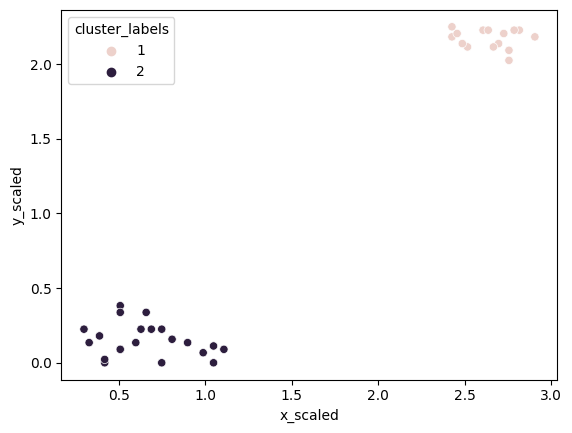

In [28]:
#distance_matrix = scipy.cluster.hierarchy.linkage(observations, method='single', metric='euclidean', optimal_ordering=False) #method - как считать близость
#comic_con['cluster_labels'] = scipy.cluster.hierarchy.fcluster(distance_matrix, num_clusters, criterion) #criterion - порог

from scipy.cluster.hierarchy import linkage, fcluster
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data = comic_con)
plt.show()

1. single
2. complete
3. average
4. centroid
5. median
6. ward

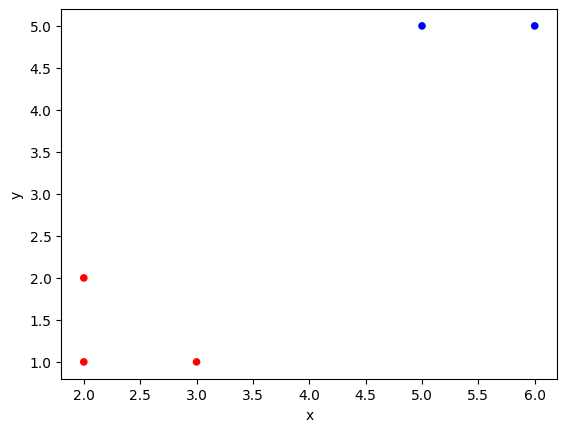

In [25]:
from matplotlib import pyplot as plt
df = pd.DataFrame({'x': [2, 3, 5, 6, 2], 'y': [1, 1, 5, 5, 2], 'labels': ['A','A', 'B', 'B', 'A']})
colors = {'A':'red', 'B':'blue'}
df.plot.scatter(x='x', y='y', c=df['labels'].apply(lambda x: colors[x]))
plt.show()

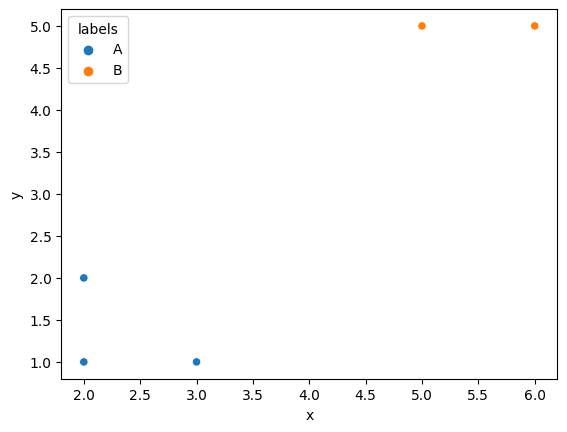

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.DataFrame({'x': [2, 3, 5, 6, 2], 'y': [1, 1, 5, 5, 2], 'labels': ['A', 'A', 'B', 'B', 'A']})
sns.scatterplot(x='x', y='y', hue='labels', data=df)
plt.show()

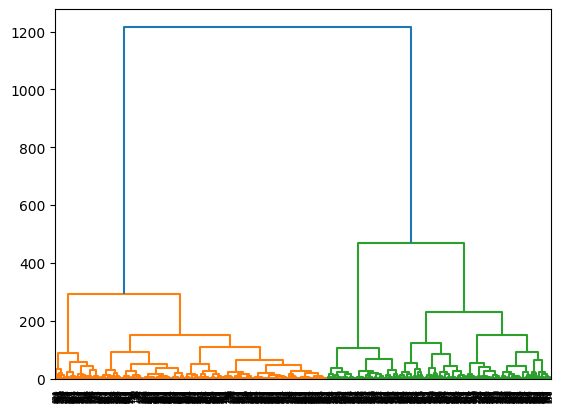

In [34]:
#отрисовка дендограмм
from scipy.cluster.hierarchy import dendrogram
df = pd.read_csv('/content/fifa_18_sample_data.csv')
Z = linkage(df[['sliding_tackle', 'aggression']], method='ward', metric='euclidean')
dn = dendrogram(Z)
plt.show()

In [35]:
#подсчет времени для иерархической кластеризации
from scipy.cluster.hierarchy import linkage
import pandas as pd
import random, timeit
points = 100
df = pd.DataFrame({'x': random.sample(range(0, points), points), 'y': random.sample(range(0, points), points)})
%timeit linkage(df[['x', 'y']], method = 'ward', metric = 'euclidean')

827 µs ± 71.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


K-MEANS

In [36]:
from scipy.cluster.vq import kmeans, vq
cluster_centers, _ = kmeans(df[['scaled_x', 'scaled_y']], 3) # 3 - кол-во кластеров, выход центры и distortion
#kmeans(obs, k_or_guess (кол-во), iter (итерации), thresh (если меньше distortion < порога стоп), check_finite (проверка NaN и inf))
df['cluster_labels'], _ = vq(df[['scaled_x', 'scaled_y']], cluster_centers) # метки и distortion (для каждой точки)
#vq(obs, code_book, check_finite=True) # code_book - центры
sns.scatterplot(x='scaled_x', y='scaled_y', hue='cluster_labels', data=df)
plt.show()

In [ ]:
# построение локтевого графика
distortions = []
num_clusters = range(2, 7)

for i in num_clusters:
    centroids, distortion = kmeans(df[['scaled_x', 'scaled_y']], i)
    distortions.append(distortion)

elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot_data)
plt.show()

Применение: проанализируем изображения, чтобы определить доминирующие цвета

In [ ]:
#matplotlib.image.imread для преобразует изображение JPEG в матрицу, содержащую значения RGB
#matplotlib.pyplot.imshow отображать цвета кластерных центров после выполнения кластерной кластеризации k-средних значений RGB
import matplotlib.image as img
image = img.imread('sea.jpg')
image.shape #выход (475, 764, 3)
r, g, b = [], [], []
for row in image:
  for pixel in row:
    temp_r, temp_g, temp_b = pixel
    r.append(temp_r)
    g.append(temp_g)
    b.append(temp_b)
pixels = pd.DataFrame({'red': r, 'blue': b, 'green': g})
pixels.head()

#строим локтевой график (указывает на 2 кластера - 2 цвета)
distortions = []
num_clusters = range(1, 11)

for i in num_clusters:
  cluster_centers, _ = kmeans(pixels[['scaled_red', 'scaled_blue', 'scaled_green']], i)
  distortions.append(distortion)
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

cluster_centers, _ = kmeans(pixels[['scaled_red', 'scaled_blue', 'scaled_green']], 2)
colors = []
r_std, g_std, b_std = pixels[['red', 'blue', 'green']].std()
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((scaled_r * r_std/255, scaled_g * g_std/255, scaled_b * b_std/255)) # вот зачем

#Dimensions: 2 x 3 (N X 3 matrix)
print(colors)

#Dimensions: 1 x 2 x 3 (1 X N x 3 matrix)
plt.imshow([colors])
plt.show()

In [ ]:
#Кластеризация документов
from nltk.tokenize import word_tokenize
import re
def remove_noise(text, stop_words = []):
  tokens = word_tokenize(text)
  cleaned_tokens = []
  for token in tokens:
      token = re.sub('[^A-Za-z0-9]+', '', token)
      if len(token) > 1 and token.lower() not in stop_words:
          cleaned_tokens.append(token.lower())
  return cleaned_tokens
remove_noise("It is lovely weather we are having. I hope the weather continues.")

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=50, min_df=0.2, tokenizer=remove_noise)
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

terms = tfidf_vectorizer.get_feature_names_out()
for i in range(num_clusters):
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])